In [37]:
%run ../ImportsConstantsSparkInit.ipynb
sc.setJobGroup("PLT_Covid", "PLT_Covid")

In [38]:
df = spark.read.format("mongo").option("collection", "FirstYearOfCovidAccidents").load()
df = df.select(concat_ws('-', df.Year, df.Month).alias("Date Range"), "AccidentCount", "Month", "Year")
df = df.orderBy("Date Range")
df = df.withColumn("Month",col("Month").cast("int"))
df = df.withColumn("Month",col("Month").cast("string"))
df.printSchema()
df.show()

root
 |-- Date Range: string (nullable = false)
 |-- AccidentCount: long (nullable = true)
 |-- Month: string (nullable = true)
 |-- Year: string (nullable = true)

+----------+-------------+-----+----+
|Date Range|AccidentCount|Month|Year|
+----------+-------------+-----+----+
|   2020-01|        27366|    1|2020|
|   2020-02|        34459|    2|2020|
|   2020-03|        46655|    3|2020|
|   2020-04|        55788|    4|2020|
|   2020-05|        55532|    5|2020|
|   2020-06|        62451|    6|2020|
|   2020-07|          186|    7|2020|
|   2020-08|          488|    8|2020|
|   2020-09|        35654|    9|2020|
|   2020-10|        69113|   10|2020|
|   2020-11|       108376|   11|2020|
|   2020-12|       117243|   12|2020|
|   2021-01|       112258|    1|2021|
|   2021-02|       115190|    2|2021|
|   2021-03|        65759|    3|2021|
|   2021-04|        70857|    4|2021|
|   2021-05|        28930|    5|2021|
+----------+-------------+-----+----+



In [39]:
df = df.na.replace(monthsDict)
df = df.select(concat_ws('-', df.Year, df.Month).alias("Date Range"), "AccidentCount")
df.show()
df = df.toPandas()

+--------------+-------------+
|    Date Range|AccidentCount|
+--------------+-------------+
|  2020-January|        27366|
| 2020-February|        34459|
|    2020-March|        46655|
|    2020-April|        55788|
|      2020-May|        55532|
|     2020-June|        62451|
|     2020-July|          186|
|   2020-August|          488|
|2020-September|        35654|
|  2020-October|        69113|
| 2020-November|       108376|
| 2020-December|       117243|
|  2021-January|       112258|
| 2021-February|       115190|
|    2021-March|        65759|
|    2021-April|        70857|
|      2021-May|        28930|
+--------------+-------------+



In [40]:
df = df.set_index('Date Range')
display(df)

,AccidentCount
Date Range,
2020-January,27366
2020-February,34459
2020-March,46655
2020-April,55788
2020-May,55532
2020-June,62451
2020-July,186
2020-August,488
2020-September,35654


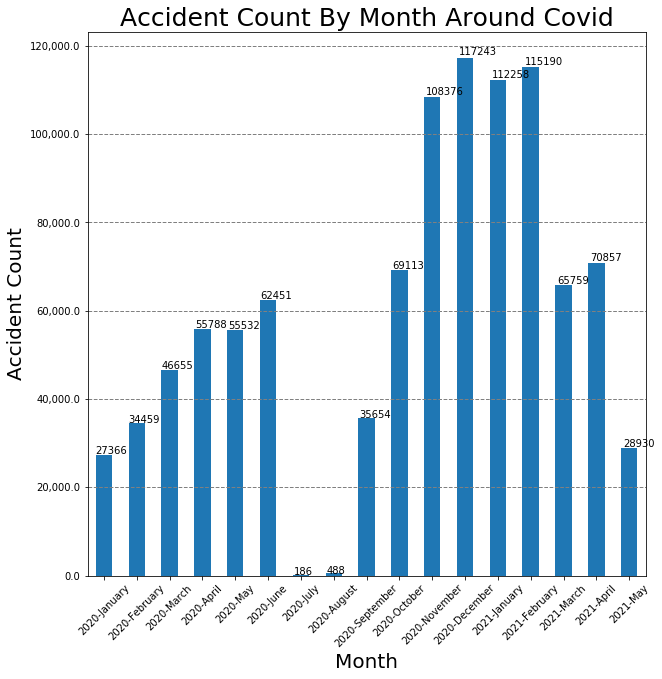

In [42]:
ax = df.plot.bar(rot=45, legend=False, figsize=(10,10))
ax.set_xlabel("Month", fontsize=20)
ax.set_ylabel("Accident Count", fontsize=20)
ax.set_title("Accident Count By Month Around Covid", fontsize = 25)
ax.grid(color='grey', linestyle='dashed', linewidth=1, axis='y')
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,}'))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))